In [3]:
print('hello world')

hello world


# DataFrame

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
from dotenv import load_dotenv
import os
import yfinance

## 生成DF

### 生成方式

### dict -> df

In [5]:
sample_dict = {
    'open' : [1, 2, 3, 4],
    'close' : [5, 6, 7, 8]
}

df = pd.DataFrame(sample_dict)

### list -> df

In [6]:
sample_dict = [
    [1, 2, 3, 4],
    [5, 6, 7, 8]
]

df = pd.DataFrame(sample_dict, index = ['open', 'close'], columns = range(4))
df = df.T

## 基本操作

### 屬性 vs 方法
1.  屬性代表物件的 **靜態特徵、狀態或儲存** 的資料。它們就像名詞一樣，描述了物件的樣子。
 > 屬性是名詞，它們只是取回物件已經儲存好的資料。
 - 代表狀態或資料： 描述物件「是什麼」或「有什麼」。
 - 調用方式： 不需括號 ()。
 - 本質： 儲存在記憶體中的一個變數。
 > 程式碼概念 > 汽車實體,說明
 > 1. car.color,顏色,"描述汽車的顏色，資料是靜態的（例如：""紅色""）。"
 > 2. car.current_speed,目前時速,描述汽車當前的速度狀態，資料是可變的（例如：60）。
 > 3. df.shape,資料形狀,"描述 DataFrame 的尺寸（例如：(100, 5)）。"
 > 4. s.dtype,資料型態,描述 Series 中元素的資料型態。
---
2.  方法代表物件 **可以執行的動態行為、操作或計算** 。它們就像動詞一樣，描述了物件能做的事情。
 > 方法是動詞，它們需要被執行才能產生結果。
 - 代表動作或功能： 描述物件「能做什麼」。
 - 調用方式： 必須有括號 ()。括號的作用是告訴程式：「執行這個動作！」
 - 本質： 儲存在記憶體中的一個函數 (Function)。
 > 程式碼概念 > 汽車實體,說明
 > 1. car.accelerate(),加速,執行一個動作，讓速度這個屬性增加。
 > 2. car.brake(power),剎車,執行一個動作，可以接收參數 power 來決定減速的程度。
 > 3. df.mean(),計算平均值,執行計算所有欄位平均值的動作，並回傳結果。
 > 4. s.notna(),檢查非缺失值,執行檢查 Series 中所有值是否為非缺失值的動作，並回傳結果。


---

#### 常見屬性

In [7]:
df.cumprod() # 累積乘法


,open,close
0,1,5
1,2,30
2,6,210
3,24,1680


## YahooFinance API套件
> pip install yfinance
> https://ranaroussi.github.io/yfinance/

In [64]:
# 資料來源YahooFinance

import yfinance as yf
tw0050 = yf.download('0050.TW', start = '1993-01-01')

C:\Users\say08\AppData\Local\Temp\ipykernel_26652\1699465132.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tw0050 = yf.download('0050.TW', start = '1993-01-01')
[*********************100%***********************]  1 of 1 completed


In [65]:
tw0050.tail(1).round(2)

Price,Close,High,Low,Open,Volume
Ticker,0050.TW,0050.TW,0050.TW,0050.TW,0050.TW
Date,,,,,
2025-11-18,60.45,61.3,60.3,61.3,264370175


In [66]:
tw0050.pct_change(periods = 1) * 100

Price,Close,High,Low,Open,Volume
Ticker,0050.TW,0050.TW,0050.TW,0050.TW,0050.TW
Date,,,,,
2009-01-02,NaN,NaN,NaN,NaN,NaN
2009-01-05,11.317266,11.317266,-6.997300,6.997213,inf
2009-01-06,-0.054655,0.000006,10.991176,4.037544,-7.445516
2009-01-07,-11.922332,-4.700730,-5.069253,-5.165333,-31.607663
2009-01-08,-6.364502,-3.039877,-6.364502,-3.170057,88.081814
...,...,...,...,...,...
2025-11-12,0.476946,-0.627946,-0.159107,-1.099766,-20.642275
2025-11-13,-0.474682,-0.552920,-0.239046,-0.238287,25.310740


In [67]:
tw0050.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4133 entries, 2009-01-02 to 2025-11-18
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, 0050.TW)   4133 non-null   float64
 1   (High, 0050.TW)    4133 non-null   float64
 2   (Low, 0050.TW)     4133 non-null   float64
 3   (Open, 0050.TW)    4133 non-null   float64
 4   (Volume, 0050.TW)  4133 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 193.7 KB


In [ ]:
# 遺漏值確認
tw0050[tw0050.isna()]

# 遺漏值刪除
tw0050.dropna(subset = [('Close', '0050.TW')])

check = tw0050.isna().any().any().sum() # 確認 沒有遺漏值

# 補上nan
tw0050.fillna(0)
tw0050.fillna(method = 'ffill', axis = 0) # 如果需要指定橫向/值向，才用method寫法，要不直接用tw0050.ffill()

C:\Users\say08\AppData\Local\Temp\ipykernel_26652\3888049754.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tw0050.fillna(method = 'ffill', axis = 0)


Price,Close,High,Low,Open,Volume
Ticker,0050.TW,0050.TW,0050.TW,0050.TW,0050.TW
Date,,,,,
2009-01-02,20.756763,20.756763,20.756763,20.756763,0
2009-01-05,23.105862,23.105862,19.304350,22.209158,26338
2009-01-06,23.093233,23.105863,21.426126,23.105863,24377
2009-01-07,20.339981,22.019719,20.339981,21.912368,16672
2009-01-08,19.045443,21.350346,19.045443,21.217734,31357
...,...,...,...,...,...
2025-11-12,63.200001,63.299999,62.750000,62.950001,59822193
2025-11-13,62.900002,62.950001,62.599998,62.799999,74963633


In [98]:
# 是否重複
ducon = tw0050[tw0050.duplicated()]
# display(ducon)
print(f'原有{len(tw0050)} 共有 {len(ducon)} 筆重複')

# 刪除重複值
# display(tw0050.drop_duplicates())
print(f'現在剩下 {len(tw0050)} 筆資料')

tw0050 = yf.download('0050.TW', start = '1993-01-01') # 恢復資料，等等繼續使用

原有4133 共有 5 筆重複
現在剩下 4133 筆資料


C:\Users\say08\AppData\Local\Temp\ipykernel_26652\4095419629.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tw0050 = yf.download('0050.TW', start = '1993-01-01') # 恢復資料，等等繼續使用
[*********************100%***********************]  1 of 1 completed


In [114]:
# column階層
'''
取得所有獨特值： 如果您只是想知道每個層級中包含了哪些唯一的標籤（類似字典的鍵），請使用 df.columns.levels。
取得所有欄位的標籤： 如果您想知道每個完整的欄位 Tuple 在特定層級（例如 Level 1）上的值是什麼，請使用 df.columns.get_level_values(層級編號或名稱)。
'''

tw0050.columns.levels # FrozenList([['Close', 'High', 'Low', 'Open', 'Volume'], ['0050.TW']])
tw0050.columns.get_level_values(1) # Index(['0050.TW', '0050.TW', '0050.TW', '0050.TW', '0050.TW'], dtype='object', name='Ticker')
tw0050.columns.get_level_values(0) # Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [133]:
tw0050.sort_values(by = [(  'High', '0050.TW')], ascending = False)
tw0050[(  'pricerank', '0050.TW')] = tw0050[(  'High', '0050.TW')].rank(method = 'average', ascending = False).astype('int')
tw0050.sort_values(by = [(  'pricerank', '0050.TW')], ascending = False)

Price,Close,High,Low,Open,Volume,pricerank
Ticker,0050.TW,0050.TW,0050.TW,0050.TW,0050.TW,0050.TW
Date,,,,,,
2014-02-06,9.048832,9.081149,9.016515,9.040753,51415188,4133
2014-02-05,9.016516,9.113468,8.984198,9.113468,230238436,4132
2014-02-07,9.145784,9.161943,9.097309,9.113468,64110096,4131
2014-02-10,9.145784,9.194261,9.145784,9.194261,24080716,4130
2014-02-11,9.202337,9.202337,9.145782,9.145782,22328312,4129
...,...,...,...,...,...,...
2025-10-29,64.400002,64.449997,63.700001,63.700001,65206490,5
2025-10-31,64.750000,64.800003,64.400002,64.599998,53629924,3


In [ ]:
# 切割
# 「小括號 () 和中括號 [] 在 qcut 結果中代表的差異」非常重要，這關係到區間的包含性 (Inclusivity)，也就是我們常說的開區間 (Open Interval) 和閉區間 (Closed Interval)。
tw0050[(  'Open_cut', '0050.TW')] = pd.cut(bins = [10, 20, 35, 40, 60, 100],x = tw0050[(  'Open', '0050.TW')])
tw0050[(  'Open_qcut', '0050.TW')] = pd.qcut(x = tw0050[(  'Open', '0050.TW')], q = 8)
tw0050


Price,Close,High,Low,Open,Volume,pricerank,Open_cut,Open_qcut
Ticker,0050.TW,0050.TW,0050.TW,0050.TW,0050.TW,0050.TW,0050.TW,0050.TW
Date,,,,,,,,
2009-01-02,20.756756,20.756756,20.756756,20.756756,0,2530,"(20, 35]","(19.362, 28.509]"
2009-01-05,23.105867,23.105867,19.304355,22.209164,26338,2404,"(20, 35]","(19.362, 28.509]"
2009-01-06,23.093235,23.105865,21.426127,23.105865,24377,2406,"(20, 35]","(19.362, 28.509]"
2009-01-07,20.339977,22.019715,20.339977,21.912364,16672,2501,"(20, 35]","(19.362, 28.509]"
2009-01-08,19.045450,21.350355,19.045450,21.217742,31357,2518,"(20, 35]","(19.362, 28.509]"
...,...,...,...,...,...,...,...,...
2025-11-12,63.200001,63.299999,62.750000,62.950001,59822193,12,"(60, 100]","(37.636, 64.6]"
2025-11-13,62.900002,62.950001,62.599998,62.799999,74963633,16,"(60, 100]","(37.636, 64.6]"


In [153]:
tw0050 = yf.download('0050.TW', start = '1993-01-01') # 恢復資料，等等繼續使用
tw0050.columns = tw0050.columns.get_level_values(0)
tw0050.to_csv('test.csv', sep = ',', encoding = 'utf-8-sig')
tw0050.to_excel('test.xlsx', sheet_name = 'test')

df = pd.read_csv('test.csv', sep = ',', encoding = 'utf-8-sig')
df.set_index('Date', inplace = True)
dff = pd.read_excel('test.xlsx')
dff.set_index('Date', inplace = True)

display(df.head())
print('=============')
display(dff.head())



C:\Users\say08\AppData\Local\Temp\ipykernel_26652\14735127.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tw0050 = yf.download('0050.TW', start = '1993-01-01') # 恢復資料，等等繼續使用
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2009-01-02,20.756758,20.756758,20.756758,20.756758,0
2009-01-05,23.105865,23.105865,19.304354,22.209162,26338
2009-01-06,23.093233,23.105863,21.426126,23.105863,24377
2009-01-07,20.339979,22.019717,20.339979,21.912366,16672
2009-01-08,19.045444,21.350348,19.045444,21.217736,31357


,Close,High,Low,Open,Volume
Date,,,,,
2009-01-02,20.756758,20.756758,20.756758,20.756758,0
2009-01-05,23.105865,23.105865,19.304354,22.209162,26338
2009-01-06,23.093233,23.105863,21.426126,23.105863,24377
2009-01-07,20.339979,22.019717,20.339979,21.912366,16672
2009-01-08,19.045444,21.350348,19.045444,21.217736,31357


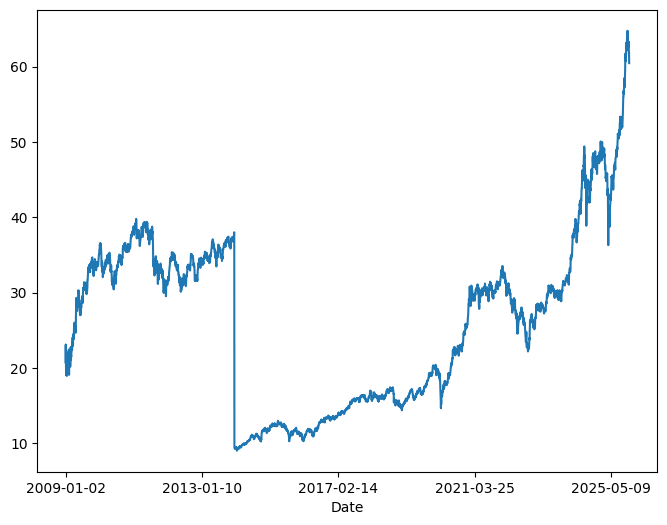

In [175]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
# plt.plot(df['Close'])
df.Close.plot(x = df.index)
plt.show()

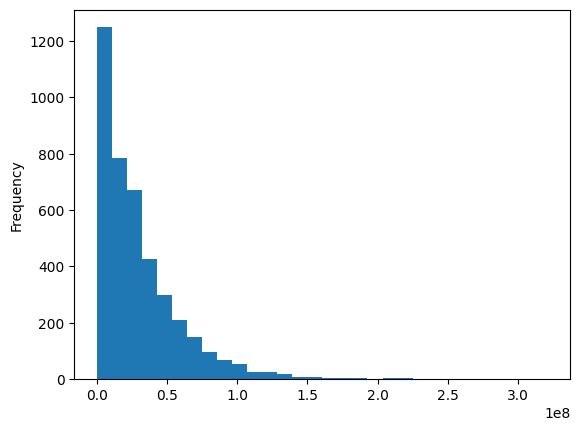

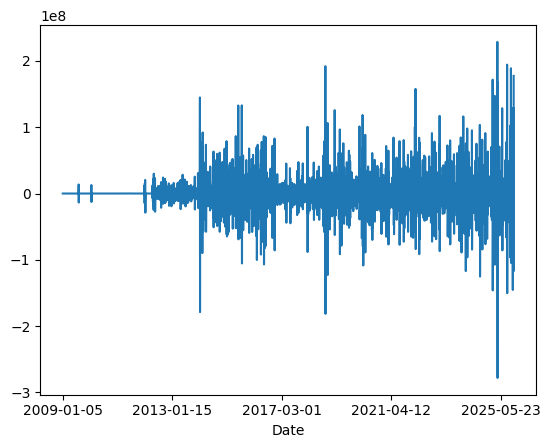

In [180]:
df[df.Volume != 0].Volume.plot.hist(bins = 30)
plt.show()
df[df.Volume != 0].diff(periods = 1).Volume.plot()
plt.show()

KeyError: "None of [Index([                   nan,    0.11317315411992412, -0.0005467170232971164,\n         -0.11922340729985248,   -0.06364483819262312,    0.06830241821525984,\n          0.06114217275607636,   -0.04474987104159078,    0.06460496182694286,\n         -0.10842677703450598,\n       ...\n        -0.012509761180865664,  0.0023752606105666985,  -0.011848341375032656,\n         0.012789756144178321,  -0.007103345841847242,   0.004769463112606065,\n         -0.00474682331390841,  -0.019077913097438337,  0.0032415034111246133,\n         -0.02342489058474806],\n      dtype='float64', length=4133)] are in the [columns]"

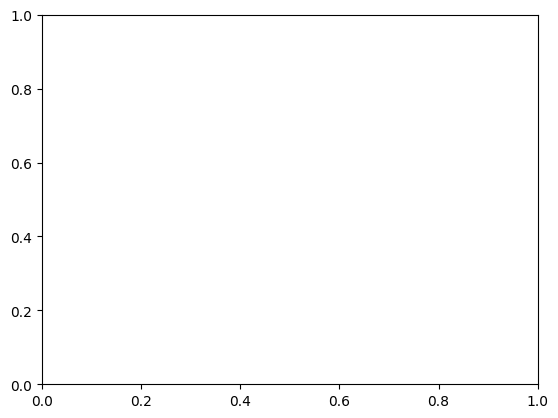

In [185]:
xvalue = df['Close'].divide(df['Close'].shift(1)) - 1
yvalue = df['Volume'].diff(periods = 1)
df[df['Volume'] != 0].plot.scatter(x =xvalue, y = yvalue)

plt.show()

## 課堂練習
透過迴圈，將df資料逐一顯示

In [115]:
for i in df.columns:
    for j in df.index:
        print(f'這個是 {i}的 第 {j}列', end = '\t')
        print(df.loc[j, i])

這個是 open的 第 0列	1
這個是 open的 第 1列	2
這個是 open的 第 2列	3
這個是 open的 第 3列	4
這個是 close的 第 0列	5
這個是 close的 第 1列	6
這個是 close的 第 2列	7
這個是 close的 第 3列	8


In [116]:
for i in range(len(df.columns)):
    for j in range(len(df.index)):
        print(f'這個是 第 {i}行 第 {j}列的值 : ', end = '\t')
        print(df.iloc[j, i])

這個是 第 0行 第 0列的值 : 	1
這個是 第 0行 第 1列的值 : 	2
這個是 第 0行 第 2列的值 : 	3
這個是 第 0行 第 3列的值 : 	4
這個是 第 1行 第 0列的值 : 	5
這個是 第 1行 第 1列的值 : 	6
這個是 第 1行 第 2列的值 : 	7
這個是 第 1行 第 3列的值 : 	8


請實作出每日的  **開盤 及 收盤** 的平均價格

In [117]:

def meanoc(df1 : pd.DataFrame, df2 : pd.DataFrame) -> pd.DataFrame:
    ans = (df1 + df2) / 2
    return ans

# temp_0050 = (tw0050['Close'] + tw0050['Open']) / 2 # 法一
temp_0050 = (tw0050[['Close', 'Open']].mean(axis = 1)).to_frame('aveP') # 法二
# temp_0050 = meanoc(tw0050['Close'], tw0050['Open']) # 法三
temp_0050.head()

,aveP
Date,
2009-01-02,20.756756
2009-01-05,22.657516
2009-01-06,23.099550
2009-01-07,21.126171
2009-01-08,20.131596


In [118]:
close5 = tw0050.iloc[-5:]['Close'].mean().round(2)
close5

Ticker
0050.TW    62.03
dtype: float64

In [119]:
# 抓出成交量 > 平均數的日期

volmean = tw0050[('Volume', '0050.TW')].mean()
tw0050[(tw0050[('Volume', '0050.TW')].ge(volmean))]


Price,Close,High,Low,Open,Volume
Ticker,0050.TW,0050.TW,0050.TW,0050.TW,0050.TW
Date,,,,,
2012-01-13,32.110771,32.363364,32.047624,32.300217,39263092
2012-05-16,31.700312,32.268642,31.637162,32.205495,32978827
2012-05-18,31.365627,31.731887,31.334054,31.605590,37830294
2012-06-04,30.108988,30.437358,29.963748,30.437358,37179608
2012-09-14,35.047161,35.110308,34.605124,34.605124,35619400
...,...,...,...,...,...
2025-11-12,63.200001,63.299999,62.750000,62.950001,59822193
2025-11-13,62.900002,62.950001,62.599998,62.799999,74963633
